# Combine Datasets

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

## NYC Airbnb

In [2]:
df_ny = pd.read_csv("./AB_NYC_2019.csv")
df_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df_ny.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
df_ny.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
# check null
df_ny.dropna(inplace=True)
df_ny.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Crime data

In [6]:
df_cr = pd.read_csv('./NYPD_Complaint_Data_Historic.csv')
df_cr['CMPLNT_FR_DT'] = pd.to_datetime(df_cr['CMPLNT_FR_DT'], errors = 'coerce')
# use only 2019 data
df_cr = df_cr[df_cr['CMPLNT_FR_DT'].dt.year == 2019]

/var/folders/x1/w01rc1gd3fz63zzk7t85lxyr0000gn/T/ipykernel_21296/2513101989.py:2: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cr = pd.read_csv('./NYPD_Complaint_Data_Historic.csv')


In [7]:
df_cr.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
26646,777026494,2019-01-01,09:30:00,NaN,NaN,47.0,01/01/2019,104,RAPE,157.0,...,M,NaN,40.887451,-73.847608,"(40.88745131300004, -73.84760778699996)",PATROL BORO BRONX,NaN,18-24,BLACK HISPANIC,F
55918,552996231,2019-01-01,16:25:00,NaN,NaN,90.0,01/01/2019,118,DANGEROUS WEAPONS,793.0,...,M,NaN,40.701528,-73.943227,"(40.70152764800008, -73.94322736199996)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,E
73049,262231032,2019-01-01,00:30:00,NaN,NaN,5.0,01/01/2019,109,GRAND LARCENY,415.0,...,NaN,NaN,40.721274,-73.993598,"(40.72127357100004, -73.99359794999998)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE,M
76095,648393954,2019-01-01,09:00:00,NaN,NaN,25.0,01/01/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.809846,-73.936607,"(40.80984560400003, -73.93660735599997)",PATROL BORO MAN NORTH,NaN,25-44,BLACK,F
110648,225086803,2019-01-02,05:15:00,01/02/2019,05:25:00,24.0,01/02/2019,105,ROBBERY,382.0,...,M,NaN,40.790850,-73.974567,"(40.79085024400007, -73.97456654299998)",PATROL BORO MAN NORTH,NaN,25-44,BLACK,M


In [8]:
complaints_per_neigh = df_cr.groupby(["BORO_NM"]).count()["CMPLNT_NUM"]
df_ny['crimes_neigh'] = df_ny["neighbourhood_group"].apply(lambda x: complaints_per_neigh[x.upper()])

In [9]:
# Retain one decimal on crime_data
df_cr['Latitude_block'] = df_cr['Latitude'].round(1)
df_cr['Longitude_block'] = df_cr['Longitude'].round(1)
complaints_per_block = df_cr.groupby(['Latitude_block','Longitude_block']).count()["CMPLNT_NUM"]
complaints_per_block = pd.DataFrame(complaints_per_block)
complaints_per_block

CMPLNT_NUM
Latitude_block Longitude_block            
40.5           -74.3                    46
               -74.2                  1870
               -74.1                   155
40.6           -74.2                  3881
               -74.1                 12568
               -74.0                 30593
               -73.9                 13858
               -73.8                  6298
               -73.7                   740
40.7           -74.0                 69211
               -73.9                 75977
               -73.8                 31933
               -73.7                  5669
40.8           -74.0                 42006
               -73.9                 97817
               -73.8                 13933
               -73.7                   539
40.9           -73.9                 37495
               -73.8                  6387

In [10]:
# Retain one decimal on ny_data & merge loc
df_ny['Latitude_block'] = df_ny['latitude'].round(1)
df_ny['Longitude_block'] = df_ny['longitude'].round(1)
df_ny = pd.merge(df_ny,complaints_per_block,on = ['Latitude_block','Longitude_block'])
df_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,crimes_neigh,Latitude_block,Longitude_block,CMPLNT_NUM
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,129370,40.6,-74.0,30593
1,62095,BK Sweet Suite w/Kitchen&FullBath,281764,Colette&Sean,Brooklyn,East Flatbush,40.64446,-73.95030,Entire home/apt,65,3,238,2019-06-14,2.30,1,2,129370,40.6,-74.0,30593
2,63546,Large and Cozy Private Bedroom,308652,Antonín,Brooklyn,Kensington,40.64106,-73.97426,Private room,39,1,45,2019-05-16,0.46,2,365,129370,40.6,-74.0,30593
3,125594,SUPER BIG AND COZY PRIVATE BEDROOM,308652,Antonín,Brooklyn,Kensington,40.64302,-73.97255,Private room,39,1,82,2019-05-19,0.94,2,365,129370,40.6,-74.0,30593
4,217580,"Luxury Furnished 1 bedro, Bay Ridge",1121193,Samuel,Brooklyn,Fort Hamilton,40.61927,-74.03070,Entire home/apt,100,30,7,2018-11-14,0.08,1,241,129370,40.6,-74.0,30593


## Subway data

In [11]:
df_subway = pd.read_csv('./nyc-transit-subway-entrance-and-exit-data.csv')
df_subway.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"{'longitude': '-73.998091', 'latitude': '40.66...","{'longitude': '-73.99822', 'latitude': '40.660..."
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"{'longitude': '-73.998091', 'latitude': '40.66...","{'longitude': '-73.997952', 'latitude': '40.66..."
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"{'longitude': '-74.003549', 'latitude': '40.65...","{'longitude': '-74.004306', 'latitude': '40.65..."
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"{'longitude': '-74.003549', 'latitude': '40.65...","{'longitude': '-74.004113', 'latitude': '40.65..."
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"{'longitude': '-74.003549', 'latitude': '40.65...","{'longitude': '-74.004499', 'latitude': '40.65..."


In [12]:
# Retrieve the station's longitude and latitude from the Station Location column
station_locs = df_subway['Station Location'].apply(lambda x : list(json.loads(x.replace("'",'"')).values()) )
station_locs = np.array(station_locs.tolist())
station_locs = station_locs.astype(float)
station_locs

array([[-73.998091,  40.660397],
       [-73.998091,  40.660397],
       [-74.003549,  40.655144],
       ...,
       [-73.85062 ,  40.903125],
       [-73.85062 ,  40.903125],
       [-73.85062 ,  40.903125]])

In [13]:
def find_nearest(x):
    # approximate radius of earth in km
    R = 6373.0   
    # get lat and loc of airbnb
    lats0 = x['latitude']
    long0 = x['longitude']    
    distance = list()       
    # convert location to radians
    loc0 = np.radians(np.array([long0,lats0]).reshape(-1,2))    
    # diff in long and lats
    dist = np.radians(station_locs) - loc0    
    # diff in lats & long
    lats_diff = dist[:,1]
    long_diff = dist[:,0]    
    # calculate distance
    a = (np.sin(lats_diff/2))**2 + np.cos(lats0) * np.cos(station_locs[:,1]) * (np.sin(long_diff /2))**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c    
    # return minimum distancs in km
    return min(distance)

In [14]:
df_ny["distance to nearest subway (km)"] = df_ny.apply(lambda x : find_nearest(x),axis=1 )
df_ny["distance to nearest subway (km)"]

0        0.521922
1        0.162608
2        0.677530
3        0.785734
4        0.295155
           ...   
38816    7.632430
38817    9.012945
38818    2.101818
38819    0.688250
38820    1.120697
Name: distance to nearest subway (km), Length: 38821, dtype: float64

In [15]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 38820
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               38821 non-null  int64  
 1   name                             38821 non-null  object 
 2   host_id                          38821 non-null  int64  
 3   host_name                        38821 non-null  object 
 4   neighbourhood_group              38821 non-null  object 
 5   neighbourhood                    38821 non-null  object 
 6   latitude                         38821 non-null  float64
 7   longitude                        38821 non-null  float64
 8   room_type                        38821 non-null  object 
 9   price                            38821 non-null  int64  
 10  minimum_nights                   38821 non-null  int64  
 11  number_of_reviews                38821 non-null  int64  
 12  last_review       

## Standardize Data

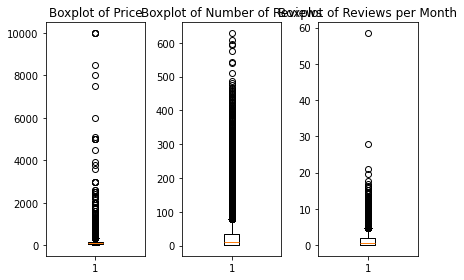

In [16]:
fig, axs = plt.subplots(1, 3)  

axs[0].boxplot(x=df_ny["price"])
axs[0].set_title("Boxplot of Price")

axs[1].boxplot(x=df_ny["number_of_reviews"])
axs[1].set_title("Boxplot of Number of Reviews")

axs[2].boxplot(x=df_ny["reviews_per_month"])
axs[2].set_title("Boxplot of Reviews per Month")

plt.tight_layout()
plt.show()

In [17]:
df_ny = df_ny[df_ny.price < df_ny.price.quantile(0.95)]
df_ny["log_price"] = np.log1p(df_ny["price"])

df_ny = df_ny[df_ny.number_of_reviews < df_ny.number_of_reviews.quantile(0.95)]
df_ny["log_number_of_reviews"] = np.log1p(df_ny["number_of_reviews"])


df_ny = df_ny[df_ny.reviews_per_month < df_ny.reviews_per_month.quantile(0.95)]
df_ny["log_reviews_per_month"] = np.log1p(df_ny["reviews_per_month"])

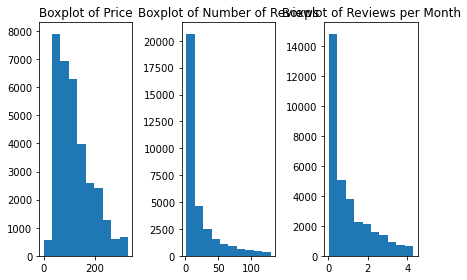

In [18]:
fig, axs = plt.subplots(1, 3)  

axs[0].hist(x=df_ny["price"])
axs[0].set_title("Boxplot of Price")

axs[1].hist(x=df_ny["number_of_reviews"])
axs[1].set_title("Boxplot of Number of Reviews")

axs[2].hist(x=df_ny["reviews_per_month"])
axs[2].set_title("Boxplot of Reviews per Month")

plt.tight_layout()
plt.show()

In [20]:
df_ny['whether_recommend'] = (df_ny['reviews_per_month'] > df_ny['reviews_per_month'].mean()).astype(int)

In [21]:
df_ny.to_csv('./data.csv', index=False, mode='w')